Here we will train the network for question t02.

In [12]:
import os
import cv2
import numpy as np
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data.sampler import SubsetRandomSampler

from classes import CustomImageDataset
from classes import CustomDataLoader
from classes import model1



We use our custom classes from classes.py to create the Database and Dataloaders

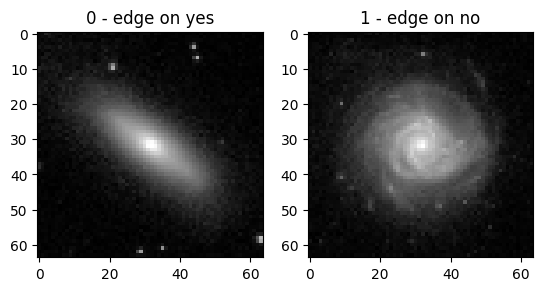

In [2]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.CenterCrop(212),
                                transforms.Resize(64),
                                
                              ])

csv_annotations_file = r"t02.csv"
annotations_file=pd.read_csv(csv_annotations_file)

img_dir=r"images"

t02_galaxies = CustomImageDataset (annotations_file , img_dir, transform=transform)



In [3]:
t02_data_loader = CustomDataLoader(32, 0.2, 0.2, t02_galaxies)

train_loader = t02_data_loader.train_loader()
validation_loader=t02_data_loader.validation_loader()
test_loader = t02_data_loader.test_sampler()

Training the same model we used for question t01, this time for question t02.

In [6]:
t02_model = model1()

import torch.optim as optim
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(t02_model.parameters(), lr=0.001, momentum=0.9)

epochs = 10

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = t02_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0
            
print('Finished Training')

[1,   100] loss: 0.785
[1,   200] loss: 0.369
[1,   300] loss: 0.353
[1,   400] loss: 0.331
[1,   500] loss: 0.358
[1,   600] loss: 0.343
[1,   700] loss: 0.334
[1,   800] loss: 0.353
[1,   900] loss: 0.327
[1,  1000] loss: 0.337
[1,  1100] loss: 0.346
[1,  1200] loss: 0.352
[1,  1300] loss: 0.323
[1,  1400] loss: 0.346
[1,  1500] loss: 0.352
[1,  1600] loss: 0.331
[1,  1700] loss: 0.324
[1,  1800] loss: 0.331
[1,  1900] loss: 0.307
[1,  2000] loss: 0.300
[1,  2100] loss: 0.296
[1,  2200] loss: 0.246
[1,  2300] loss: 0.227
[1,  2400] loss: 0.230
[1,  2500] loss: 0.217
[1,  2600] loss: 0.218
[1,  2700] loss: 0.190
[1,  2800] loss: 0.213
[1,  2900] loss: 0.208
[1,  3000] loss: 0.189
[1,  3100] loss: 0.192
[1,  3200] loss: 0.183
[1,  3300] loss: 0.194
[1,  3400] loss: 0.179
[1,  3500] loss: 0.204
[1,  3600] loss: 0.198
[2,   100] loss: 0.184
[2,   200] loss: 0.197
[2,   300] loss: 0.166
[2,   400] loss: 0.186
[2,   500] loss: 0.201
[2,   600] loss: 0.194
[2,   700] loss: 0.181
[2,   800] 

In [7]:
#Saving model
PATH = './t02_net.pth'
#torch.save(t02_model.state_dict(), PATH)